In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
I = cv2.imread('materialy/I.jpg')
J = cv2.imread('materialy/J.jpg')

# zmniejszenie obrazow 4krotnie zeby sie szybciej wykonywalo
scale = 0.5
I_resized = cv2.resize(I, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
J_resized = cv2.resize(J, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# skala szarosci
I_gray = cv2.cvtColor(I_resized, cv2.COLOR_BGR2GRAY)  
J_gray = cv2.cvtColor(J_resized, cv2.COLOR_BGR2GRAY)  

# różnica między obrazami
diff = cv2.absdiff(I_gray, J_gray)

cv2.imshow('i', I_gray)
cv2.imshow('j', J_gray)
cv2.imshow('diff', diff)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
W2 = 5  # połowa rozmiaru okna (7x7)
window_size = 2 * W2 + 1
dX = dY = 5  # max zakres przesuniecia

# macierze na wektory przepływu optycznego
u = np.zeros_like(I_gray, dtype=np.float32)
v = np.zeros_like(I_gray, dtype=np.float32)

for j in range(W2, I_gray.shape[0] - W2):
    for i in range(W2, I_gray.shape[1] - W2):
        # wycięcie bloku z ramki I
        IO = np.float32(I_gray[j - W2:j + W2 + 1, i - W2:i + W2 + 1])

        min_distance = float('inf')
        best_dx, best_dy = 0, 0

        # przeszukiwanie otoczenia w ramce J
        for dy in range(-dY, dY + 1):
            for dx in range(-dX, dX + 1):
                nj, ni = j + dy, i + dx

                # sprawdzenie czy współrzędne mieszczą się w zakresie
                if W2 <= nj < I_gray.shape[0] - W2 and W2 <= ni < I_gray.shape[1] - W2:
                    # wycięcie bloku z ramki J
                    JO = np.float32(J_gray[nj - W2:nj + W2 + 1, ni - W2:ni + W2 + 1])

                    # obliczenie odległości między blokami
                    distance = np.sqrt(np.sum(np.square(JO - IO)))

                    # najlepsze dopasowanie
                    if distance < min_distance:
                        min_distance = distance
                        best_dx, best_dy = dx, dy

        u[j, i] = best_dx
        v[j, i] = best_dy



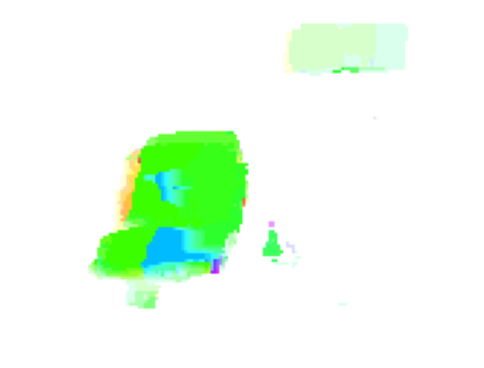

In [39]:
# konwersja do współrzędnych biegunowych
magnitude, angle = cv2.cartToPolar(u, v)

# obraz HSV
hsv = np.zeros((I_gray.shape[0], I_gray.shape[1], 3), dtype=np.uint8)

# H - kat ruchu w przedziale 0-180
hsv[..., 0] = np.uint8(angle * 90 / np.pi)

# S - normalizacja wektora do 0-255
hsv[..., 1] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# V - max wartosc 255
hsv[..., 2] = 255

# konwersja na rgb
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(6, 6))
plt.imshow(flow_rgb)
plt.axis('off')
plt.show()


In [5]:
cm1 = cv2.imread('materialy/cm1.png')
cm2 = cv2.imread('materialy/cm2.png')

# zmniejszenie obrazow zeby sie szybciej wykonywalo
scale = 0.5
cm1_resized = cv2.resize(cm1, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
cm2_resized = cv2.resize(cm2, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# skala szarosci
cm1_gray = cv2.cvtColor(cm1_resized, cv2.COLOR_BGR2GRAY)  
cm2_gray = cv2.cvtColor(cm2_resized, cv2.COLOR_BGR2GRAY)  

# różnica między obrazami
diff = cv2.absdiff(cm1_gray, cm2_gray)

W2 = 5  # połowa rozmiaru okna
window_size = 2 * W2 + 1
dX = dY = 5  # max zakres przesuniecia

# macierze na wektory przeplywu
u = np.zeros_like(cm1_gray, dtype=np.float32)
v = np.zeros_like(cm1_gray, dtype=np.float32)

for j in range(W2, cm1_gray.shape[0] - W2):
    for i in range(W2, cm1_gray.shape[1] - W2):
        # wycięcie bloku z ramki I
        cm1O = np.float32(cm1_gray[j - W2:j + W2 + 1, i - W2:i + W2 + 1])

        min_distance = float('inf')
        best_dx, best_dy = 0, 0

        # przeszukiwanie otoczenia w ramce J
        for dy in range(-dY, dY + 1):
            for dx in range(-dX, dX + 1):
                nj, ni = j + dy, i + dx

                # sprawdzenie czy współrzędne mieszczą się w zakresie
                if W2 <= nj < cm1_gray.shape[0] - W2 and W2 <= ni < cm1_gray.shape[1] - W2:
                    # wycięcie bloku z ramki J
                    cm2O = np.float32(cm2_gray[nj - W2:nj + W2 + 1, ni - W2:ni + W2 + 1])

                    # obliczenie odległości między blokami
                    distance = np.sqrt(np.sum(np.square(cm1O - cm2O)))

                    # najlepsze dopasowanie
                    if distance < min_distance:
                        min_distance = distance
                        best_dx, best_dy = dx, dy

        u[j, i] = best_dx
        v[j, i] = best_dy

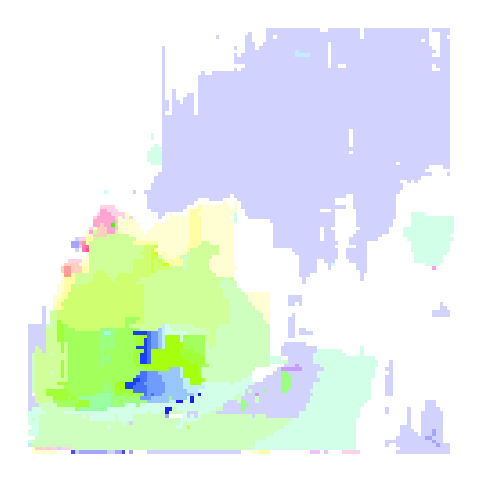

In [6]:
# konwersja do współrzędnych biegunowych
magnitude, angle = cv2.cartToPolar(u, v)

# obraz HSV
hsv = np.zeros((cm1_gray.shape[0], cm1_gray.shape[1], 3), dtype=np.uint8)

# H - kat ruchu w przedziale 0-180
hsv[..., 0] = np.uint8(angle * 90 / np.pi)

# S - normalizacja wektora do 0-255
hsv[..., 1] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# V - max wartosc 255
hsv[..., 2] = 255

# konwersja na rgb
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(6, 6))
plt.imshow(flow_rgb)
plt.axis('off')
plt.show()


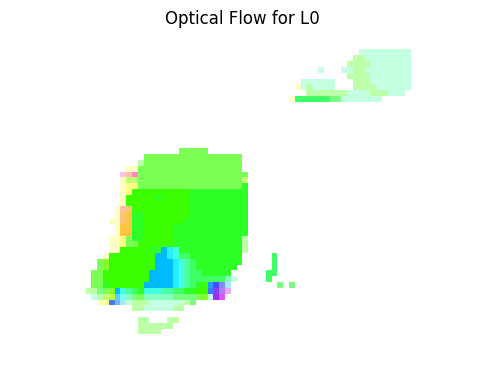

In [ ]:
def of(I_org, I, J, W2=3, dY=3, dX=3):
    # diff = cv2.absdiff(I_org, J)

    u = np.zeros_like(I, dtype=np.float32)
    v = np.zeros_like(I, dtype=np.float32)

    for j in range(W2, I.shape[0] - W2):
        for i in range(W2, I.shape[1] - W2):
            IO = np.float32(I[j - W2:j + W2 + 1, i - W2:i + W2 + 1])

            min_distance = float('inf')
            best_dx, best_dy = 0, 0

            # otoczenie w ramce J
            for dy in range(-dY, dY + 1):
                for dx in range(-dX, dX + 1):
                    nj, ni = j + dy, i + dx

                    # czy współrzędne mieszczą się w zakresie
                    if W2 <= nj < I.shape[0] - W2 and W2 <= ni < I.shape[1] - W2:
                        # blok z ramki J
                        JO = np.float32(J[nj - W2:nj + W2 + 1, ni - W2:ni + W2 + 1])

                        distance = np.sqrt(np.sum(np.square(JO - IO)))

                        # najlepsze dopasowanie
                        if distance < min_distance:
                            min_distance = distance
                            best_dx, best_dy = dx, dy

            # wektory przepływu optycznego
            u[j, i] = best_dx
            v[j, i] = best_dy

    return u, v


def vis_flow(u, v, YX, name):

    magnitude, angle = cv2.cartToPolar(u, v)
    hsv = np.zeros((YX[0], YX[1], 3), dtype=np.uint8)

    # H kąt ruchu
    hsv[..., 0] = np.uint8(angle * 90 / np.pi)

    # S normalizacja długości wektora do 0-255
    hsv[..., 1] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # V na maksymalną wartość (255)
    hsv[..., 2] = 255

    flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Wyświetlenie obrazu
    plt.figure(figsize=(6, 6))
    plt.imshow(flow_rgb)
    plt.axis('off')
    plt.title(name)
    plt.show()


# testowanie algorytmu na jednej skali
u, v = of(I_gray, I_gray, J_gray, W2=3, dY=3, dX=3)
vis_flow(u, v, I_gray.shape, 'Optical Flow for L0')

In [34]:
def pyramid(im, max_scale):
    images = [im]
    for k in range(1, max_scale):
        # zmniejszamy obraz 2x w każdym kroku
        images.append(cv2.resize(images[k - 1], (0, 0), fx=0.5, fy=0.5))
    return images

def optical_flow_pyramid(I_org, I, J, max_scale=3, W2=3, dY=3, dX=3):
    IP = pyramid(I, max_scale)  # Piramida dla obrazu I
    JP = pyramid(J, max_scale)  # Piramida dla obrazu J
    
    u_total = np.zeros_like(I, dtype=np.float32)
    v_total = np.zeros_like(I, dtype=np.float32)
    
    # Zaczynamy od najmniejszej skali
    I = IP[-1]  # Przypisanie najmniejszego obrazu do I
    
    for scale in range(max_scale - 1, -1, -1):  # Idziemy od najmniejszej do największej skali
        I_scaled = IP[scale]
        J_scaled = JP[scale]
        
        # Wyliczenie przepływu optycznego
        u, v = of(I_org, I, J_scaled, W2=W2, dY=dY, dX=dX)
        vis_flow(u, v, I_scaled.shape, f'OF for scale {scale+1}')
        
        # Tworzymy kopię obrazu I
        I_new = np.copy(I)
        
        # Modyfikujemy I_new zgodnie z przepływem
        for j in range(W2, I_new.shape[0] - W2):
            for i in range(W2, I_new.shape[1] - W2):
                nj, ni = j + int(v[j, i]), i + int(u[j, i])

                # Sprawdzamy, czy nowe współrzędne mieszczą się w obrazie
                if 0 <= nj < I_new.shape[0] and 0 <= ni < I_new.shape[1]:
                    I_new[nj, ni] = I[j, i]

        # Jeśli nie jesteśmy na największej skali, powiększamy I_new
        if scale > 0:
            I = cv2.resize(I_new, (IP[scale - 1].shape[1], IP[scale - 1].shape[0]), interpolation=cv2.INTER_LINEAR)
        
        # Przeskalowujemy przepływ optyczny i sumujemy
        u_scaled = cv2.resize(u, (I_org.shape[1], I_org.shape[0]), interpolation=cv2.INTER_LINEAR) * (2 ** scale)
        v_scaled = cv2.resize(v, (I_org.shape[1], I_org.shape[0]), interpolation=cv2.INTER_LINEAR) * (2 ** scale)
        
        u_total += u_scaled
        v_total += v_scaled
    
    # Wizualizujemy całkowity przepływ
    vis_flow(u_total, v_total, I.shape, f'Total OF for {max_scale} scales')
    
    return u_total, v_total



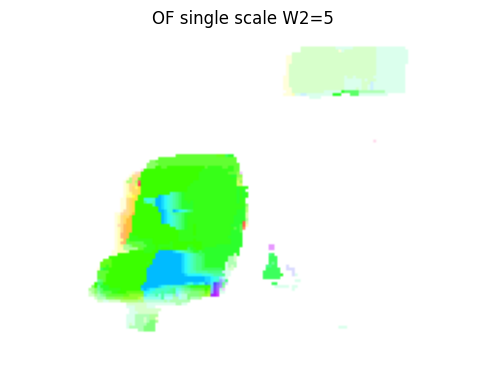

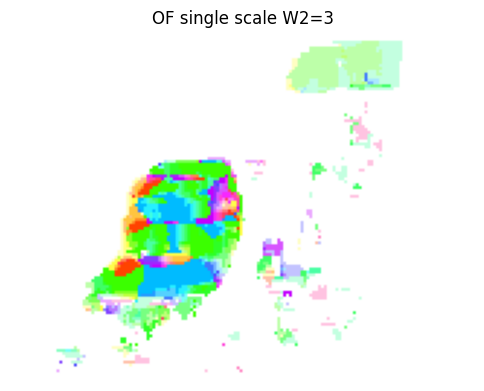

In [19]:
# Wywołanie algorytmu na jednej skali
u, v = of(I_gray, I_gray, J_gray, W2=5, dY=5, dX=5)  # Większe okno
vis_flow(u, v, I_gray.shape, 'OF single scale W2=5')

# Dla mniejszych okien (W2=3)
u, v = of(I_gray, I_gray, J_gray, W2=3, dY=3, dX=3)
vis_flow(u, v, I_gray.shape, 'OF single scale W2=3')


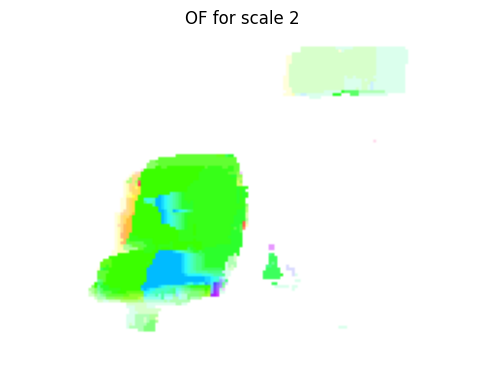

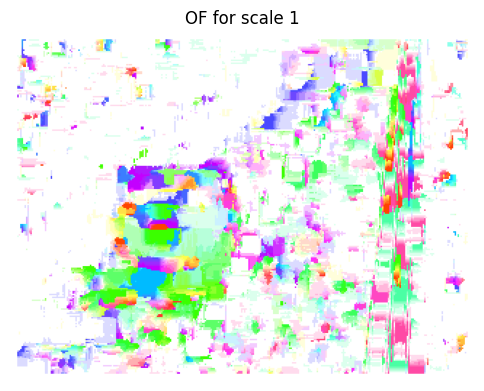

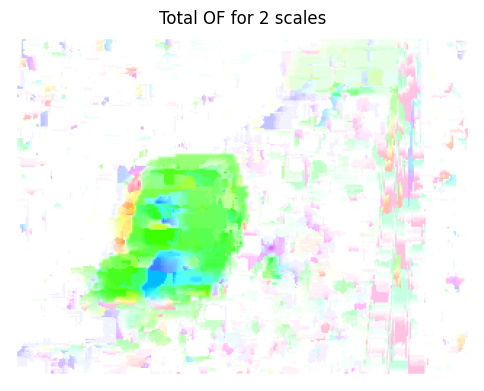

In [35]:
I = cv2.imread('materialy/I.jpg', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('materialy/J.jpg', cv2.IMREAD_GRAYSCALE)

u, v = optical_flow_pyramid(I, I, J, max_scale=2, W2=5, dY=5, dX=5)


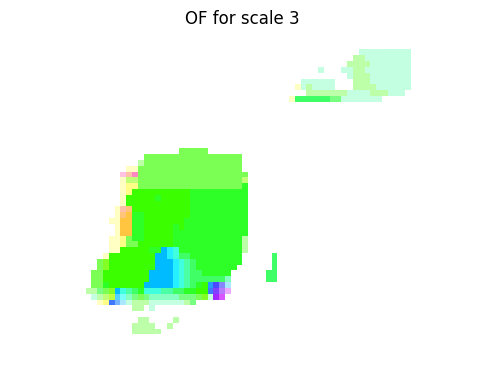

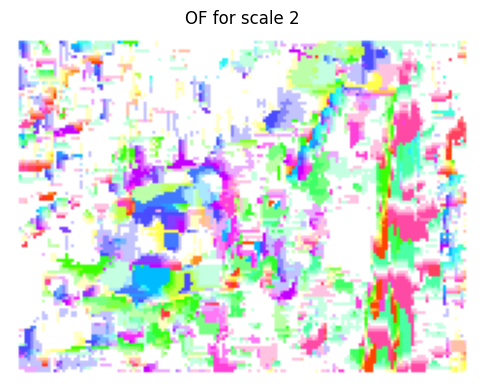

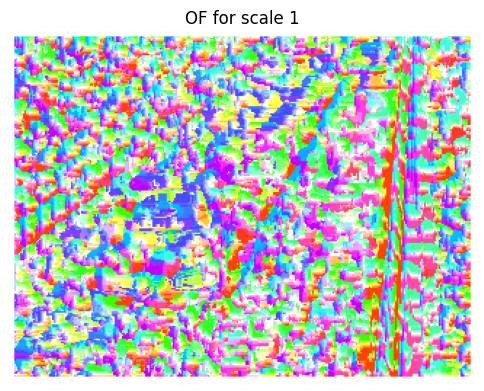

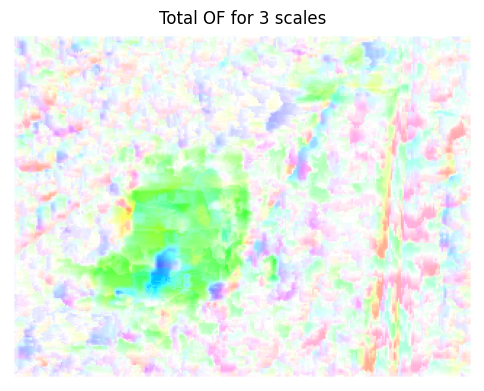

In [36]:
u, v = optical_flow_pyramid(I, I, J, max_scale=3, W2=3, dY=3, dX=3)

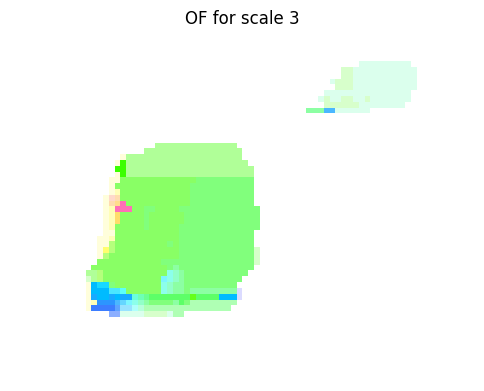

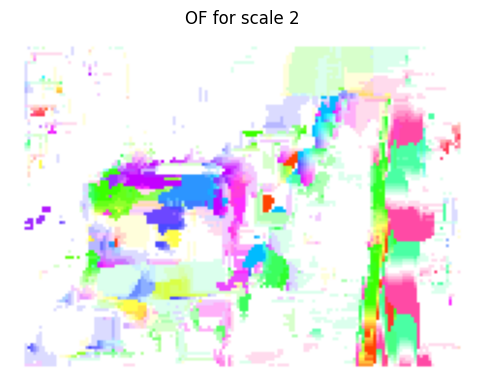

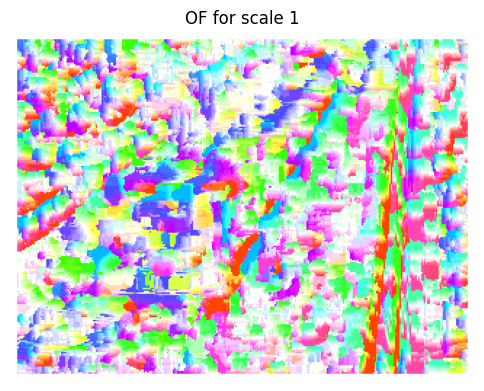

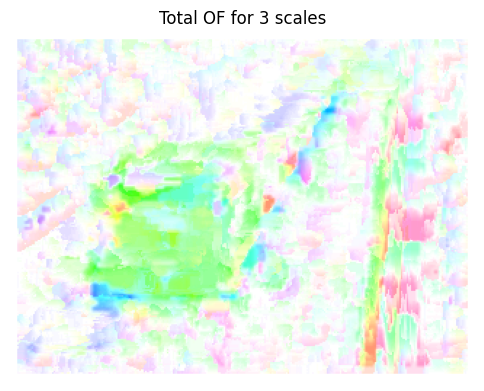

In [37]:
I = cv2.imread('materialy/I.jpg', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('materialy/J.jpg', cv2.IMREAD_GRAYSCALE)

u, v = optical_flow_pyramid(I, I, J, max_scale=3, W2=5, dY=5, dX=5)